In [86]:
import pandas as pd
#extrapolated dataset
dataset=pd.read_csv('D:\\student\\final_combined_dataset.csv')
#dataset=pd.read_csv('D:\\student\\merged.csv')
dataset_cols=list(dataset.columns)
print(dataset_cols)
maths_cols=['traveltime.x', 'studytime.x', 'failures.x', 'schoolsup.x','paid.x', 'activities.x', 'higher.x', 'romantic.x','freetime.x', 'goout.x', 'Dalc.x', 'Walc.x', 'health.x', 'absences.x','G1.x','G2.x','G3.x']
portugese_cols=['traveltime.y', 'studytime.y', 'failures.y', 'schoolsup.y','paid.y', 'activities.y', 'higher.y', 'romantic.y','freetime.y', 'goout.y', 'Dalc.y', 'Walc.y', 'health.y', 'absences.y','G1.y','G2.y','G3.y']
maths_dataset=dataset[maths_cols]
portugese_dataset=dataset[portugese_cols]
print(maths_dataset.shape)
print(portugese_dataset.shape)

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian.x', 'traveltime.x', 'studytime.x', 'failures.x', 'schoolsup.x', 'famsup.x', 'paid.x', 'activities.x', 'higher.x', 'romantic.x', 'famrel.x', 'freetime.x', 'goout.x', 'Dalc.x', 'Walc.x', 'health.x', 'absences.x', 'G1.x', 'G2.x', 'G3.x', 'guardian.y', 'traveltime.y', 'studytime.y', 'failures.y', 'schoolsup.y', 'famsup.y', 'paid.y', 'activities.y', 'higher.y', 'romantic.y', 'famrel.y', 'freetime.y', 'goout.y', 'Dalc.y', 'Walc.y', 'health.y', 'absences.y', 'G1.y', 'G2.y', 'G3.y']
(882, 17)
(882, 17)


In [87]:
def encode_features(dataframe):#encode the nominal categorical features and convert marks to categorical
    cols=list(dataframe.columns)
    marks_cols=['G1.x','G2.x','G3.x','G1.y','G2.y','G3.y']
    for col in cols:
        if dataframe[col].dtype=='object':
            dataframe[col]=dataframe[col].astype('category')
            dataframe[col]=dataframe[col].cat.codes#label encoding
        if col in marks_cols:#marks are converted into two categories i.e binary classification
            marks=list(dataframe[col])
            fail=[]
            for m in marks:
                if m in list(range(0,10)):
                    fail.append(0)
                if m in list(range(10,21)):
                    fail.append(1)
            dataframe[col]=fail
    return dataframe
maths_encoded_dataset=encode_features(maths_dataset)
portugese_encoded_dataset=encode_features(portugese_dataset)
                

C:\Users\sudhe\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [88]:
"""The following code cells show some of the features which are highly correlated with each of the resposne variables
for both portugese and maths data.The correlation score is an absolute score which would tell us whether a feature
is highly correlated with the response vairable or not"""

'The following code cells show some of the features which are highly correlated with each of the resposne variables\nfor both portugese and maths data.The correlation score is an absolute score which would tell us whether a feature\nis highly correlated with the response vairable or not'

G1.x            1.000000
G2.x            0.710195
G3.x            0.619360
failures.x      0.572945
schoolsup.x     0.104843
studytime.x     0.104788
higher.x        0.082890
goout.x         0.047402
paid.x          0.044137
Dalc.x          0.040126
romantic.x      0.034885
Walc.x          0.028948
traveltime.x    0.018644
health.x        0.016746
absences.x      0.015173
activities.x    0.014889
freetime.x      0.005078
Name: G1.x, dtype: float64
$$$$$$$$$$$$$$$$$$$$$$
G2.x            1.000000
G3.x            0.862893
G1.x            0.710195
failures.x      0.504351
schoolsup.x     0.395756
higher.x        0.099105
goout.x         0.081130
absences.x      0.078124
traveltime.x    0.073312
studytime.x     0.064823
Walc.x          0.058839
paid.x          0.058445
activities.x    0.033998
romantic.x      0.012221
health.x        0.010898
Dalc.x          0.003382
freetime.x      0.001271
Name: G2.x, dtype: float64
$$$$$$$$$$$$$$$$$$$$$$$$$$
G3.x            1.000000
G2.x            0.862

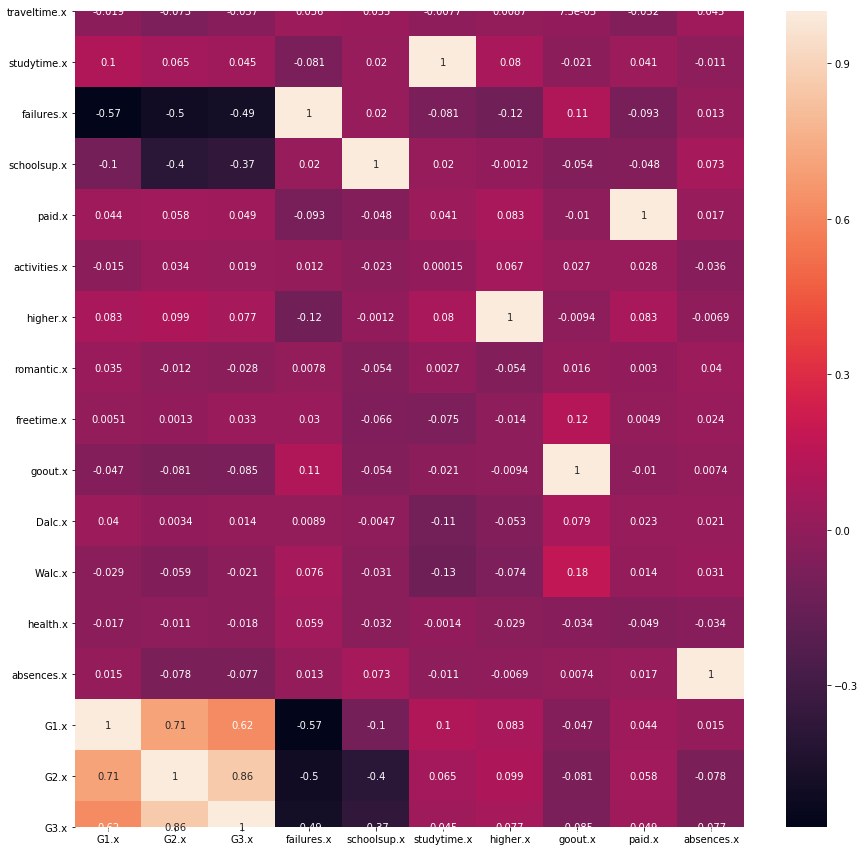

In [89]:
maths_corr=maths_encoded_dataset.corr()
print(abs(maths_corr['G1.x']).sort_values(ascending=False))#sort the values in descending order
print('$$$$$$$$$$$$$$$$$$$$$$')
print(abs(maths_corr['G2.x']).sort_values(ascending=False))
print('$$$$$$$$$$$$$$$$$$$$$$$$$$')
print(abs(maths_corr['G3.x']).sort_values(ascending=False))
sm_corr=maths_corr[['G1.x','G2.x','G3.x','failures.x','schoolsup.x','studytime.x','higher.x','goout.x','paid.x','absences.x']]
print(sm_corr.shape)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(sm_corr,annot=True)
plt.savefig('correlation.png')
plt.show()

G1.y            1.000000
G3.y            0.653269
G2.y            0.650906
higher.y        0.296654
failures.y      0.282466
schoolsup.y     0.180549
studytime.y     0.180004
Dalc.y          0.171758
traveltime.y    0.116341
absences.y      0.093504
Walc.y          0.077386
activities.y    0.076410
freetime.y      0.062680
paid.y          0.061566
health.y        0.043682
goout.y         0.038180
romantic.y      0.016467
Name: G1.y, dtype: float64
$$$$$$$$$$$$$$$$$$$$$$
G2.y            1.000000
G3.y            0.681358
G1.y            0.650906
failures.y      0.298520
higher.y        0.270388
Dalc.y          0.179863
studytime.y     0.144745
absences.y      0.126879
Walc.y          0.094608
schoolsup.y     0.090218
freetime.y      0.078451
activities.y    0.074378
goout.y         0.072376
traveltime.y    0.062757
romantic.y      0.060018
health.y        0.050745
paid.y          0.036724
Name: G2.y, dtype: float64
$$$$$$$$$$$$$$$$$$$$$$$$$$
G3.y            1.000000
G2.y            0.681

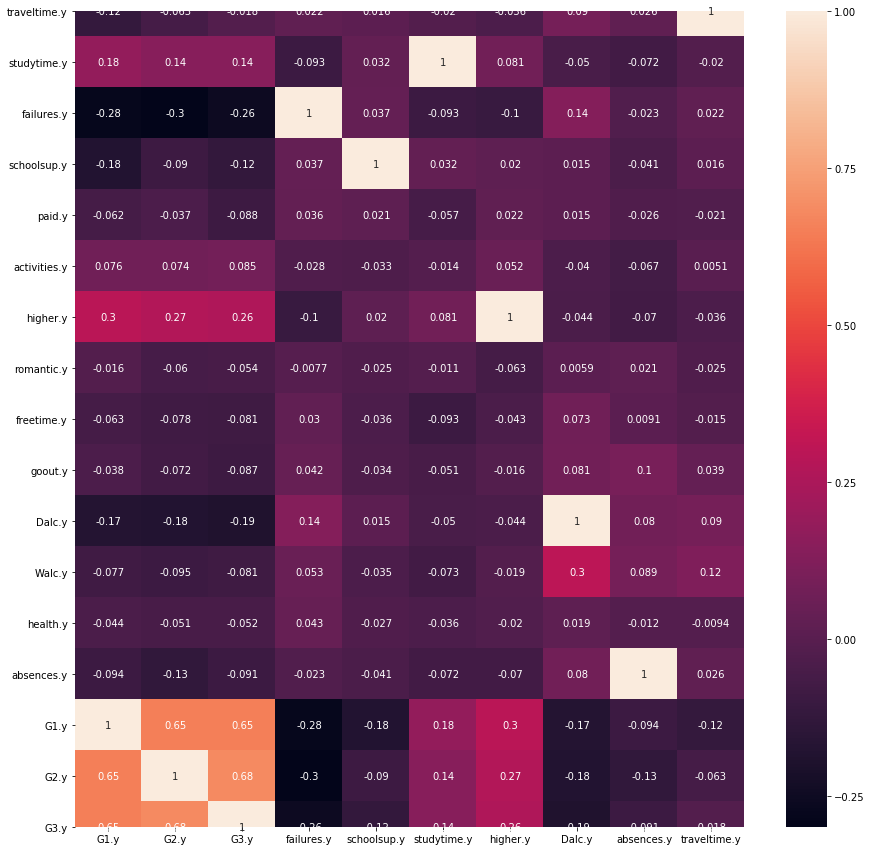

In [90]:
portugese_corr=portugese_encoded_dataset.corr()
#print(abs(portugese_corr['studytime.y']).sort_values(ascending=False))
print(abs(portugese_corr['G1.y']).sort_values(ascending=False))
print('$$$$$$$$$$$$$$$$$$$$$$')
print(abs(portugese_corr['G2.y']).sort_values(ascending=False))
print('$$$$$$$$$$$$$$$$$$$$$$$$$$')
print(abs(portugese_corr['G3.y']).sort_values(ascending=False))
pg_corr=portugese_corr[['G1.y','G2.y','G3.y','failures.y','schoolsup.y','studytime.y','higher.y','Dalc.y','absences.y','traveltime.y']]
#import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(pg_corr,annot=True)
plt.savefig('portugese_correlation.png')
plt.show()

In [91]:
"""The following function predict_labels() takes a dataframe and a machine learning model object as inputs.
It performs an train_test split on the data to create a train and test datasets 
It then predicts the labels of a response variable for each of the three response variables G1,G2&G3"""

'The following function predict_labels() takes a dataframe and a machine learning model object as inputs.\nIt performs an train_test split on the data to create a train and test datasets \nIt then predicts the labels of a response variable for each of the three response variables G1,G2&G3'

In [92]:
from sklearn.model_selection import train_test_split
def predict_labels(dataframe,model):#predict the class labels for each of the three grades for a given model
    index=-3#position of G-1
    data_cols=list(dataframe.columns)
    predicted_labels=[]
    for i in range(0,3):
        feature_data=dataframe[data_cols[:index]]
        label=dataframe[data_cols[index]]
        X_train, X_test, y_train, y_test = train_test_split(feature_data, label, test_size=0.33, random_state=42)
        #print(y_train)
        index+=1
        #increment the index by 1 so as to select the next response variable and include present response variable as a feature
        model.fit(X_train,y_train)
        pl=model.predict(X_test)
        predicted_labels.append((y_test,pl))
    return predicted_labels        
    
    

In [93]:
"""The following code will initialize various machine learning models and then calls predict_labels function.
Based on predicted labels it prepares a classification report and calculates a cohen-kappa-score for each response variable and 
for each model"""

'The following code will initialize various machine learning models and then calls predict_labels function.\nBased on predicted labels it prepares a classification report and calculates a cohen-kappa-score for each response variable and \nfor each model'

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,cohen_kappa_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
clf = LogisticRegression()
neigh=KNeighborsClassifier(n_neighbors=7)
sv=SVC()
dc=DecisionTreeClassifier()
rd=RandomForestClassifier(max_depth=4)
gnb=GaussianNB()
#gbc=GradientBoostingClassifier(random_state=0)
xboost=XGBClassifier()
list_models={'knn':neigh,'svm':sv,'decision tree':dc,'random forest':rd,'naive bayes':gnb,'xgboost':xboost,'logistic regression':clf}#models with default hyperparameters
marks=['G1','G2','G3']
for key,val in list_models.items():#calculate accuracy and f-1 score for maths dataset for each of three grades
    labs=predict_labels(maths_encoded_dataset,val)
    print(key)
    full_info={}
    for i in range(len(labs)):
        pred=classification_report(labs[i][0],labs[i][1],target_names=['0','1'],output_dict=True)
        print('kappa statistic for %r is %r ' % (marks[i],cohen_kappa_score(labs[i][0],labs[i][1])))
        required_output=pred['0']#the precision ,recall and f1 score for the class 0
        #support -> number of times a particular class is present in actual test labels
        full_info[marks[i]]=required_output
    df=pd.DataFrame(full_info)
    print(df)
    print('******************************************************************')
    
print('######################################################################')


knn
kappa statistic for 'G1' is 0.17169647781892672 
kappa statistic for 'G2' is 0.232407657050418 
kappa statistic for 'G3' is 0.3432052483598875 
                  G1         G2         G3
precision   0.619048   0.769231   0.909091
recall      0.168831   0.217391   0.303030
f1-score    0.265306   0.338983   0.454545
support    77.000000  92.000000  99.000000
******************************************************************
svm
kappa statistic for 'G1' is 0.317540801774679 
kappa statistic for 'G2' is 0.5684729064039409 
kappa statistic for 'G3' is 0.7208870439152283 
                  G1         G2         G3
precision   0.950000   0.923077   0.890244
recall      0.246753   0.521739   0.737374
f1-score    0.391753   0.666667   0.806630
support    77.000000  92.000000  99.000000
******************************************************************
decision tree
kappa statistic for 'G1' is 0.3103485720490824 
kappa statistic for 'G2' is 0.7109546854377475 
kappa statistic for 'G3' is 0.7

C:\Users\sudhe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [95]:
for key,val in list_models.items():#calculate accuracy and f-1 score for portugese dataset for each of three grades
    labs=predict_labels(portugese_encoded_dataset,val)
    full_info={}
    print('%r model' % key)
    for i in range(len(labs)):
        pred=classification_report(labs[i][0],labs[i][1],target_names=['0','1'],output_dict=True)
        print('kappa statistic for %r is %r ' % (marks[i],cohen_kappa_score(labs[i][0],labs[i][1])))
        required_output=pred['0']
        full_info[marks[i]]=required_output
    df=pd.DataFrame(full_info)
    print(df)
    print('******************************************************************')


C:\Users\sudhe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sudhe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'knn' model
kappa statistic for 'G1' is 0.0 
kappa statistic for 'G2' is 0.0 
kappa statistic for 'G3' is 0.16140149339460075 
             G1    G2         G3
precision   0.0   0.0   1.000000
recall      0.0   0.0   0.090909
f1-score    0.0   0.0   0.166667
support    21.0  21.0  11.000000
******************************************************************
'svm' model
kappa statistic for 'G1' is 0.0 
kappa statistic for 'G2' is 0.0 
kappa statistic for 'G3' is 0.0 
             G1    G2    G3
precision   0.0   0.0   0.0
recall      0.0   0.0   0.0
f1-score    0.0   0.0   0.0
support    21.0  21.0  11.0
******************************************************************
'decision tree' model
kappa statistic for 'G1' is 0.09848005066497778 
kappa statistic for 'G2' is 0.3442328422565576 
kappa statistic for 'G3' is 0.4116553006819591 
                  G1         G2         G3
precision   0.153846   0.400000   0.416667
recall      0.190476   0.380952   0.454545
f1-score    0.170213   0.39

In [96]:
maths_encoded_dataset['G1.x'].value_counts()

1    665
0    217
Name: G1.x, dtype: int64

In [97]:
print(maths_encoded_dataset['G2.x'].value_counts())
print(maths_encoded_dataset['G3.x'].value_counts())

1    606
0    276
Name: G2.x, dtype: int64
1    606
0    276
Name: G3.x, dtype: int64


In [98]:
print(portugese_encoded_dataset['G1.y'].value_counts())
print(portugese_encoded_dataset['G2.y'].value_counts())
print(portugese_encoded_dataset['G3.y'].value_counts())

1    813
0     69
Name: G1.y, dtype: int64
1    818
0     64
Name: G2.y, dtype: int64
1    836
0     46
Name: G3.y, dtype: int64


In [99]:
"""predict_featureimp()-> predicts the feature importance score for all features based on random forest classifier for
both maths and portugese data"""

'predict_featureimp()-> predicts the feature importance score for all features based on random forest classifier for\nboth maths and portugese data'

In [100]:
def predict_featureimp(dataframe,model):#predict the class labels for each of the three grades for a given model
    index=-3
    data_cols=list(dataframe.columns)
    predicted_feature_importances={}
    for i in range(0,3):
        feature_imps={}
        feature_cols=data_cols[:index]
        feature_data=dataframe[feature_cols]
        label_col=data_cols[index]
        print(label_col)
        label=dataframe[label_col]
        X_train, X_test, y_train, y_test = train_test_split(feature_data, label, test_size=0.33, random_state=42)
        #print(y_train)
        index+=1
        model.fit(X_train,y_train)
        data=model.feature_importances_
        for j in range(len(feature_cols)):
            feature_imps[feature_cols[j]]=data[j]
        predicted_feature_importances[label_col]=feature_imps
    return predicted_feature_importances
raf=RandomForestClassifier()
math_data=predict_featureimp(maths_encoded_dataset,raf)
portu_data=predict_featureimp(portugese_encoded_dataset,raf)
feature_importance_data=pd.DataFrame(math_data)
portu_feature_importance_data=pd.DataFrame(portu_data)
g1_data=feature_importance_data['G1.x'].sort_values(ascending=False)
g2_data=feature_importance_data['G2.x'].sort_values(ascending=False)
g3_data=feature_importance_data['G3.x'].sort_values(ascending=False)
portu_g1_data=portu_feature_importance_data['G1.y'].sort_values(ascending=False)
portu_g2_data=portu_feature_importance_data['G2.y'].sort_values(ascending=False)
portu_g3_data=portu_feature_importance_data['G3.y'].sort_values(ascending=False)



G1.x
G2.x
G3.x
G1.y
G2.y
G3.y


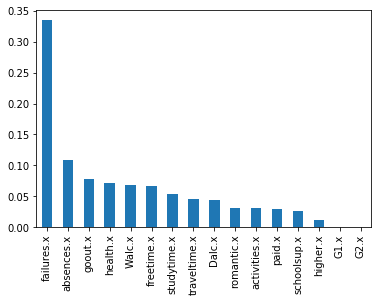

In [101]:
g1_data.plot(kind='bar')

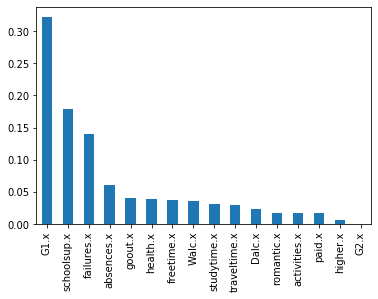

In [102]:
g2_data.plot(kind='bar')

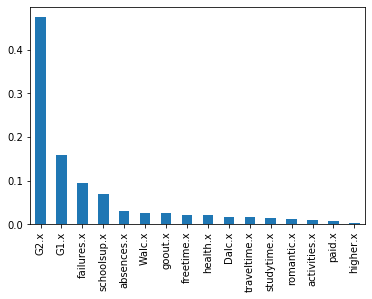

In [103]:
g3_data.plot(kind='bar')

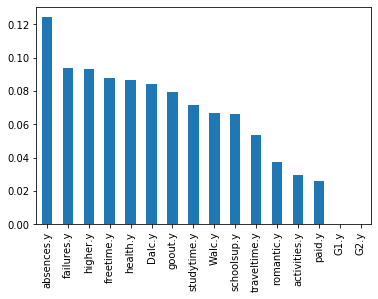

In [104]:
portu_g1_data.plot(kind='bar')

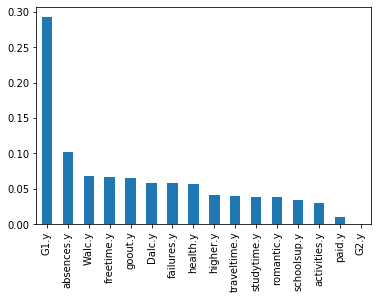

In [105]:
portu_g2_data.plot(kind='bar')

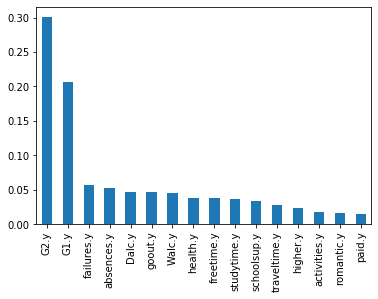

In [106]:
portu_g3_data.plot(kind='bar')